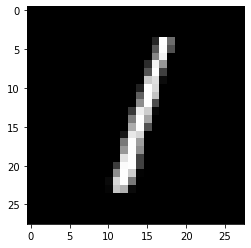

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2653 - accuracy: 0.9220
Epoch 2/4
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1077 - accuracy: 0.9669
Epoch 3/4
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0730 - accuracy: 0.9768
Epoch 4/4
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0547 - accuracy: 0.9829
10000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy:  0.9758
<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x15260ddd8>>
INFO:tensorflow:Assets written to: mnist_predictor.model1/assets
7
Test loss: 0.08151117876875215


IndexError: list index out of range

In [8]:
import tensorflow as tf
import numpy as np
import warnings
mnist = tf.keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()
# http://yann.lecun.com/exdb/mnist/
import matplotlib.pyplot as plt
plt.imshow(X_test[2]) 
plt.imshow(X_test[2], cmap=plt.cm.binary_r)
plt.show()
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
opt = tf.keras.optimizers.Adam(lr=0.001, epsilon=None)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=4)
val_loss, val_acc = model.evaluate(X_test, y_test)
print('Accuracy: ', val_acc)
print(model.summary)
model.save('mnist_predictor.model1')
new_model = tf.keras.models.load_model('mnist_predictor.model1')
predictions = new_model.predict(X_test)
print(np.argmax(predictions[0]))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[2])
